# Floating point examples

In [72]:
import struct
import numpy as np
import matplotlib.pyplot as plt
def decode_float32(x):
    """Decode a 32-bit float from its hexadecimal representation.""" 
    bits = x.view(np.uint32)

    # Extract fields
    sign     = (bits >> 31) & 0x1
    exponent = np.uint32((bits >> 23) & 0xFF)
    mantissa = bits & 0x7FFFFF

    return sign, exponent, mantissa


x = np.float32(1.5e10)
h = x.view(np.uint32)
print(f"Hex representation: {h:08X}")
s, e, m = decode_float32(x)
print(f"Sign: {s}, Exponent: {e}, Mantissa: {m:08x}")

xhat = ((-1.0)**s) * ( 1.0  + float(m) / ((2.0)**23))* ((2.0)**(e - 127))
print(f"Reconstructed value: {xhat}")

Hex representation: 505F8476
Sign: 0, Exponent: 160, Mantissa: 005f8476
Reconstructed value: 15000000512.0


In [47]:
import pandas as pd
p = 10
w = 5
m = np.round((p+w)/2)
A = 2**(-m)
c = np.array([1, 15, -15, -60, 1000], dtype=np.int32)    
e = np.array([0, 3, 3, 10, 31], dtype=np.int32)
x = A * c  * (2**w)
s = (c<0).astype(np.int32)


print(m)
df = pd.DataFrame({'s': s, 'c': np.abs(c), 'e': e, 'x': x})
print(df)





8.0
   s     c   e        x
0  0     1   0    0.125
1  0    15   3    1.875
2  1    15   3   -1.875
3  1    60  10   -7.500
4  0  1000  31  125.000


In [52]:
d = float(2**31)
print('%12.4e' % d)

print( 277 / np.log2(10))

  2.1475e+09
83.3853087989228


In [83]:
from fixedpoint import FixedPoint, resize

In [ ]:
avals = [5, -3, 6]
bvals = [2, 6, 6]
fmt = {'signed': True, 'm': 4, 'n': 0, 'overflow': 'wrap', 'overflow_alert': 'ignore'}

for aval, bval in zip(avals, bvals):
    a = FixedPoint(aval, **fmt)
    b = FixedPoint(bval, **fmt)
    cfull = a + b
    c = FixedPoint(int(cfull), **fmt)
    print(f"a: {int(a)}, b: {int(b)}, c: {int(c)}, cfull: {int(cfull)}")

c2 = FixedPoint(int(c2), m=4, n=0, signed=True, overflow='wrap', overflow_alert='ignore')
print(int(c2))
print(c2.m)

a: 5, b: 2, c: 7, cfull: 7
a: -3, b: 6, c: 3, cfull: 3
a: 6, b: 6, c: 12, cfull: 12
-4
4


## Optimal Scaling

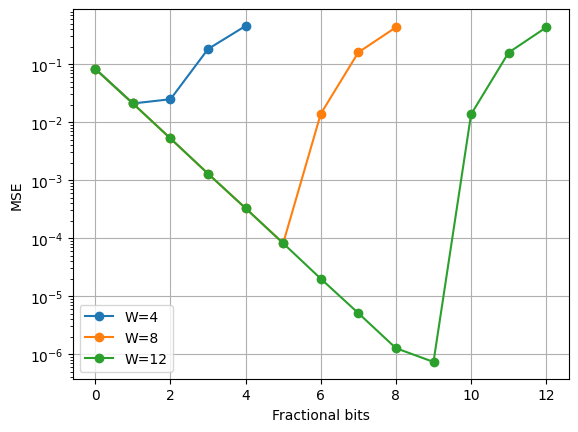

In [5]:
import numpy as np
import matplotlib.pyplot as plt
nx = 10000
w = 12  # bit width

wtest = [4, 8, 12]

x = np.random.randn(nx)
for w in wtest:
    ntest = np.arange(0,w+1)
    nt = len(ntest)
    mse = np.zeros(nt)
    for i, n in enumerate(ntest):
        q = np.round(x * 2**n).astype(np.int32)
        q = np.clip(q, -2**(w-1), 2**(w-1)-1)
        xhat = q.astype(np.float32) / (2**n)
        mse[i] = np.mean((x - xhat)**2)

    plt.semilogy(ntest, mse, marker='o', label=f'W={w}')

plt.grid()
plt.xlabel('Fractional bits')
plt.ylabel('MSE')
plt.legend()

In [71]:
x0 = np.pi
m = [3, 3, 3, 3, 3]
n = [1, 2, 4, 8, 16]
qbits = []
xhat = []
for mi, ni in zip(m, n):
    q = FixedPoint(x0, signed=True, m=mi, n=ni)
    qbits.append(q.bits)
    xhat.append(float(q))

df = pd.DataFrame({'m': m, 'n': n, 'qbits': qbits, 'xhat': xhat}, index=None)
print(df)



   m   n   qbits      xhat
0  3   1       6  3.000000
1  3   2      13  3.250000
2  3   4      50  3.125000
3  3   8     804  3.140625
4  3  16  205887  3.141586


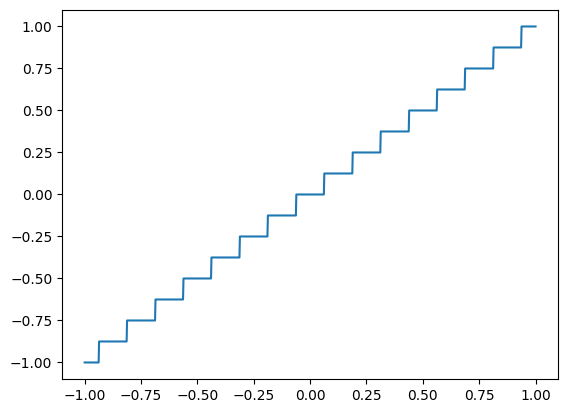

In [73]:
x = np.linspace(-1, 1, 1000)
nx = len(x)

m = 2
n = 3
qvals = []
xhat = np.zeros(nx)
for i, xi in enumerate(x):
    q = FixedPoint(xi, signed=True, m=m, n=n)
    qvals.append(float(q))
    xhat[i] = float(q)

plt.plot(x, xhat, label=f'FixedPoint m={m}, n={n}')

In [76]:
nx = 1000
x = np.random.normal(0, 1, nx)

b = 8
nvals = np.arange(1, b)
n = 6
m = b - n 

mse = []
for n in nvals: 
    xhat = np.zeros(nx)
    for i, xi in enumerate(x):
        q = FixedPoint(xi, signed=True, m=m, n=n, overflow='clip')
        xhat[i] = float(q)
    mse.append(np.mean( (x - xhat)**2 ))

plt.semilogy(nvals, mse, marker='o')


KeyError: 'clip'